# **0. 사용 모듈**
---

In [ ]:
# Data Handling
import pandas as pd
import datetime as dt

# Data Visualizing
import matplotlib.pyplot as plt
import missingno as msno
from tqdm import tqdm

# etc.
import warnings
warnings.filterwarnings('ignore')

# **1. 데이터 불러오기**
---

In [ ]:
# colab 환경설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_list = []

for i in tqdm( range(1,60) ):
    df_list.append( pd.read_csv(str(i)+".csv", encoding='cp949') )
    
df = pd.concat( df_list ).reset_index()

100%|██████████| 59/59 [00:03<00:00, 15.02it/s]


In [ ]:
df.head()

,index,일자,노선명,정류장명,ARS_ID,시간,승하차,거래건수
0,0,20220301,1187,4수원지,4263.0,10,승차,1
1,1,20220301,1187,4수원지,4264.0,12,승차,1
2,2,20220301,1187,4수원지,4264.0,13,하차,1
3,3,20220301,1187,4수원지위,4268.0,11,하차,1
4,4,20220301,1187,4수원지위,4268.0,13,하차,2


In [ ]:
df = df.drop(['index'], axis=1)
df['ARS_ID'] = df.ARS_ID.astype('object')

In [ ]:
df.head()

,일자,노선명,정류장명,ARS_ID,시간,승하차,거래건수
0,20220301,1187,4수원지,4263.0,10,승차,1
1,20220301,1187,4수원지,4264.0,12,승차,1
2,20220301,1187,4수원지,4264.0,13,하차,1
3,20220301,1187,4수원지위,4268.0,11,하차,1
4,20220301,1187,4수원지위,4268.0,13,하차,2


In [ ]:
print( "총 관측치의 수: {:,}".format(len(df)) )

총 관측치의 수: 3,670,384


# **2. EDA**
---

### 1) Target 데이터 분포 확인

1      1769752
2       743009
3       385039
4       225179
5       144212
        ...   
123          1
118          1
114          1
110          1
240          1
Name: 거래건수, Length: 149, dtype: int64


array([1769752,  743009,  385039,  225179,  144212,   97109,   68111,
         49193,   36570,   27739,   21615,   16942,   13289,   10916,
          9023,    7320,    5945,    5056,    4336,    3651,    3129,
          2683,    2308,    1997,    1730,    1567,    1315,    1156,
          1035,     874,     853,     773,     661,     597,     485,
           447,     404,     365,     341,     300,     257,     248,
           244,     194,     188,     180,     170,     138,     123,
           107,     105,      92,      87,      73,      70,      66,
            64,      59,      56,      40,      38,      35,      34,
            33,      32,      29,      27,      25,      23,      22,
            19,      15,      14,      12,      11,      10,       9,
             8,       7,       6,       5,       4,       3,       2,
             1], dtype=int64)

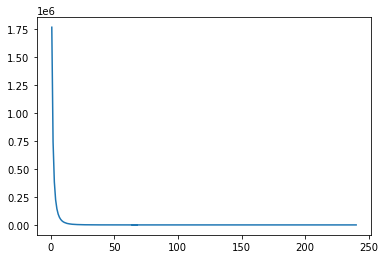

In [ ]:
print(df.거래건수.value_counts())
plt.plot(df.거래건수.value_counts())

df.거래건수.value_counts().unique()

### 2) 정류장명과 ARS_ID의 1:1 대응여부 확인

In [ ]:
print(len(df.정류장명.unique()), len(df.ARS_ID.unique()), sep='\n')
len(df.정류장명.unique()) == len(df.ARS_ID.unique())

1488
2770


False

In [ ]:
nunique_df = df.groupby('정류장명')['ARS_ID'].nunique()

print( nunique_df.unique(), end='\n\n\n' )
print( nunique_df, end='\n\n\n' )
print( nunique_df.value_counts(), end='\n\n\n' )

[2 1 4 3]


정류장명
31사단          2
4.19기념관       2
4수원지          2
4수원지위         2
5.18기념공원      2
             ..
흑석사거리(동)      2
흑석사거리(서)      2
희망가아파트        2
힐스테이트 각화      2
힐스테이트연제아파트    2
Name: ARS_ID, Length: 1487, dtype: int64


2    1268
1     213
3       4
4       2
Name: ARS_ID, dtype: int64




<br>
대부분의 정류장은 정류장명마다 2개의 ARS_ID를 가지고 있다<br>
-> 하나의 정류장마다 가는 방향, 오는 방향이 있기 때문에 총 2개의 ARS_ID를 가지고 있는 것<br>
3개 이상인 정류장도 있길래 확인해보았다.<br>
<br>

In [ ]:
nunique_df[nunique_df>=3]

정류장명
동산마을        4
명도삼거리       3
문화전당역       3
살레시오고입구     4
평촌          3
효령노인복지타운    3
Name: ARS_ID, dtype: int64

In [ ]:
df[df.정류장명=='동산마을'].ARS_ID.unique()

array([5985., 6021., 6022., 5965.])

# ![%EC%A0%9C%EB%AA%A9%20%EC%97%86%EC%9D%8C.jpg](attachment:%EC%A0%9C%EB%AA%A9%20%EC%97%86%EC%9D%8C.jpg)

<br>
* 동일 이름의 정류장이 있었던 것으로 확인<br>
* 따라서 정류장의 고유값으로는 정류장명이 아닌 ARS_ID를 사용하는 것이 바람직 함.<br>
<br>

### 3) 결측치 확인

<AxesSubplot:>

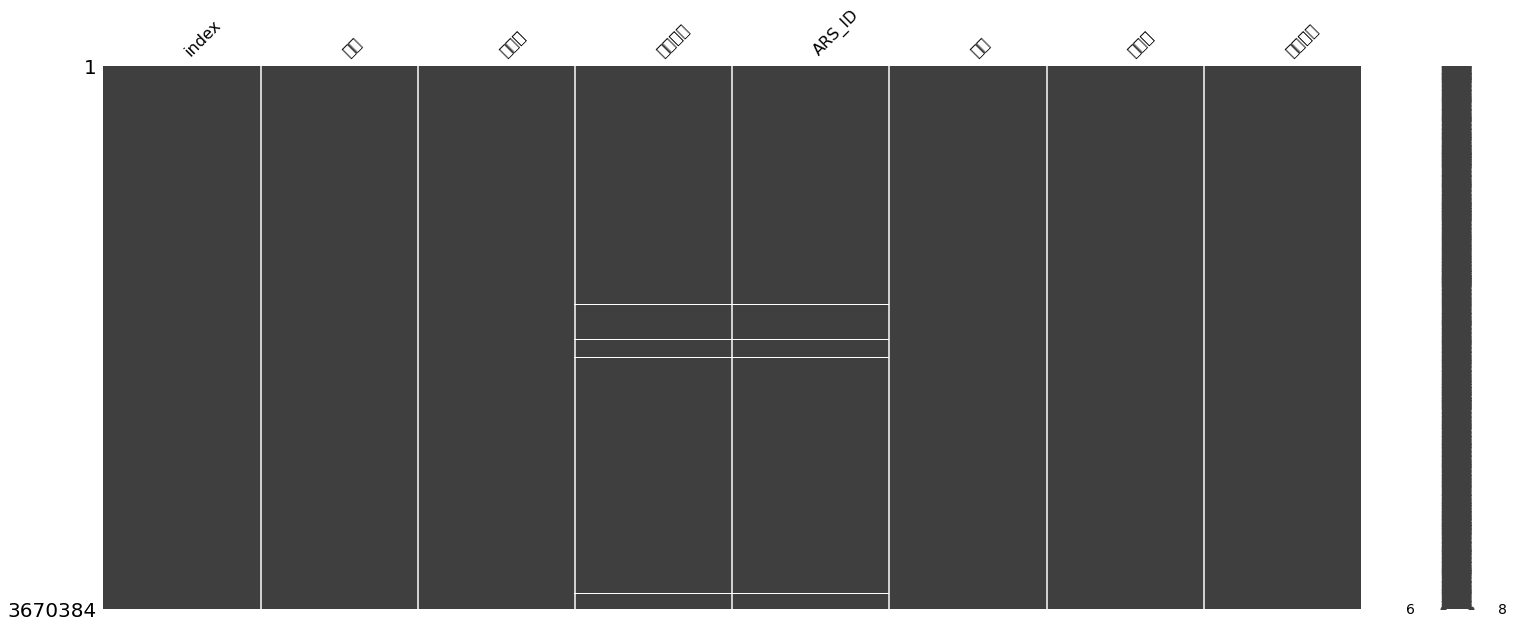

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().sum()

index         0
일자            0
노선명           0
정류장명      24032
ARS_ID    24197
시간            0
승하차           0
거래건수          0
dtype: int64

In [ ]:
df[df.ARS_ID.isnull()]

,index,일자,노선명,정류장명,ARS_ID,시간,승하차,거래건수
552,552,20220301,1187,NaN,NaN,9,승차,6
553,553,20220301,1187,NaN,NaN,10,승차,1
554,554,20220301,1187,NaN,NaN,11,승차,7
555,555,20220301,1187,NaN,NaN,12,승차,20
556,556,20220301,1187,NaN,NaN,13,승차,5
...,...,...,...,...,...,...,...,...
3670121,7206,20220331,첨단95,NaN,NaN,21,승차,1
3670122,7207,20220331,첨단95,NaN,NaN,22,승차,2
3670375,7460,20220331,충효187,NaN,NaN,8,승차,1
3670376,7461,20220331,충효187,NaN,NaN,14,승차,2


In [ ]:
df[df.정류장명.isnull()]

,index,일자,노선명,정류장명,ARS_ID,시간,승하차,거래건수
552,552,20220301,1187,NaN,NaN,9,승차,6
553,553,20220301,1187,NaN,NaN,10,승차,1
554,554,20220301,1187,NaN,NaN,11,승차,7
555,555,20220301,1187,NaN,NaN,12,승차,20
556,556,20220301,1187,NaN,NaN,13,승차,5
...,...,...,...,...,...,...,...,...
3670121,7206,20220331,첨단95,NaN,NaN,21,승차,1
3670122,7207,20220331,첨단95,NaN,NaN,22,승차,2
3670375,7460,20220331,충효187,NaN,NaN,8,승차,1
3670376,7461,20220331,충효187,NaN,NaN,14,승차,2


<br>
정류장명과 ARS_ID간의 null값 개수가 다르고, 정류장명과 정류장 ID가 Null값인 관측치가 상당수 존재.<br>
전체 데이터 셋에 비해서 매우 적은 양(약 0.5%), 또한 정류장명과 ARS_ID는 회귀식에 데이터가 아님<br>
따라서 정류장명과 ARS_ID간의 대응관계만 맞춰주고, 나머지 Null값은 모두 Drop<br>
<br>

In [ ]:
df[df.정류장명.notnull() & df.ARS_ID.isnull()]

,index,일자,노선명,정류장명,ARS_ID,시간,승하차,거래건수
14662,14662,20220301,마을788,시화문화마을문화관,NaN,8,승차,1
14663,14663,20220301,마을788,시화문화마을문화관,NaN,12,승차,1
112519,47520,20220302,마을788,시화문화마을문화관,NaN,7,승차,4
112520,47521,20220302,마을788,시화문화마을문화관,NaN,8,승차,1
112521,47522,20220302,마을788,시화문화마을문화관,NaN,10,승차,1
...,...,...,...,...,...,...,...,...
3563174,30257,20220331,마을788,시화문화마을문화관,NaN,12,승차,1
3563175,30258,20220331,마을788,시화문화마을문화관,NaN,13,승차,1
3563176,30259,20220331,마을788,시화문화마을문화관,NaN,14,승차,1
3563177,30260,20220331,마을788,시화문화마을문화관,NaN,15,승차,1


In [ ]:
df[df.정류장명.isnull() & df.ARS_ID.notnull()]

,index,일자,노선명,정류장명,ARS_ID,시간,승하차,거래건수


<br>

In [ ]:
df[df.정류장명.notnull() & df.ARS_ID.isnull()].정류장명.unique()

array(['시화문화마을문화관'], dtype=object)

<br>
정류장명은 존재하지만 ARS_ID가 존재하지 않는 경우 존재<br>
확인 결과, 각화중 방향 사회문화마을문화관 정류장은 따로 ARS_ID가 존재하지 않았음<br>
<br>

![%EC%A0%9C%EB%AA%A9%20%EC%97%86%EC%9D%8C.png](attachment:%EC%A0%9C%EB%AA%A9%20%EC%97%86%EC%9D%8C.png)

# **3. 데이터 전처리**
---

### 0) 광주광역시 노선 정보 데이터 불러오기

In [ ]:
# url = 'D:/python_projects/BusStopCongestionProject/Data/Original_data/GwangjuBusInfo/Excel/광주광역시_시내버스노선정보_11_30_2020.xls'
# BusInfo = pd.read_excel(url, sheet_name=None)

In [ ]:
# bus_dict = {}
# for i in enumerate(BusInfo):
#     key = i[1]
#     item = BusInfo[ key ].filter(regex='출발')
#     if (len(item.columns)>1):
#         item = list( set(item.iloc[:,0]) | set(item.iloc[:,1]) )
    
#     bus_dict[key] = item

In [ ]:
# for bus_names in df[df.ARS_ID.isnull()].노선명.unique():
#     if(bus_names in bus_dict.keys()):
#         print("[%s]\n총 정류장 수: %d\n데이터셋의 정류장 수: %d\n\n"
#               %(bus_names,len(bus_dict[bus_names]), df[df.노선명==bus_names].정류장명.nunique()))

[1187]
총 정류장 수: 56
데이터셋의 정류장 수: 54


[1187-1]
총 정류장 수: 23
데이터셋의 정류장 수: 21


[419]
총 정류장 수: 49
데이터셋의 정류장 수: 48


[518]
총 정류장 수: 71
데이터셋의 정류장 수: 70


[금남57]
총 정류장 수: 57
데이터셋의 정류장 수: 55


[금남58]
총 정류장 수: 30
데이터셋의 정류장 수: 28


[금남59]
총 정류장 수: 57
데이터셋의 정류장 수: 55


[금호36]
총 정류장 수: 65
데이터셋의 정류장 수: 63


[금호46]
총 정류장 수: 54
데이터셋의 정류장 수: 51


[대촌270]
총 정류장 수: 46
데이터셋의 정류장 수: 43


[대촌69]
총 정류장 수: 41
데이터셋의 정류장 수: 39


[대촌70]
총 정류장 수: 49
데이터셋의 정류장 수: 47


[대촌71]
총 정류장 수: 41
데이터셋의 정류장 수: 39


[매월06]
총 정류장 수: 34
데이터셋의 정류장 수: 32


[매월16]
총 정류장 수: 70
데이터셋의 정류장 수: 68


[매월26]
총 정류장 수: 52
데이터셋의 정류장 수: 50


[문흥18]
총 정류장 수: 65
데이터셋의 정류장 수: 64


[문흥39]
총 정류장 수: 60
데이터셋의 정류장 수: 60


[문흥53]
총 정류장 수: 25
데이터셋의 정류장 수: 23


[문흥80]
총 정류장 수: 39
데이터셋의 정류장 수: 36


[봉선27]
총 정류장 수: 71
데이터셋의 정류장 수: 69


[봉선37]
총 정류장 수: 81
데이터셋의 정류장 수: 79


[봉선76]
총 정류장 수: 50
데이터셋의 정류장 수: 49


[상무63]
총 정류장 수: 32
데이터셋의 정류장 수: 30


[상무64]
총 정류장 수: 43
데이터셋의 정류장 수: 40


[송암31]
총 정류장 수: 33
데이터셋의 정류장 수: 32


[송암47]
총 정류장 수: 65
데이터셋의 정류장 수: 65




In [ ]:
# for bus_names in df[df.ARS_ID.isnull()].노선명.unique():
#     if(bus_names in bus_dict.keys()):
#         whole_bus = set( bus_dict[bus_names] )
#         dataset_bus = set( df[df.노선명==bus_names].정류장명.unique() )
#         print("%s"%bus_names)
#         print( list(whole_bus - dataset_bus ), end='\n\n' )

1187
['국립아시아문화전당(구,도청)', '농성1동주민센터']

1187-1
['5.18민주화운동기록관', '국립아시아문화전당(구,도청)', '농성1동주민센터']

419
['국립아시아문화전당(구,도청)', '농성1동주민센터']

518
['보훈회관/518민주화운동교육관', '중소기업진흥공단 호남연수원', '국립아시아문화전당(구,도청)']

금남57
['국립아시아문화전당(구,도청)', '농성1동주민센터', '문화전당역(1130)']

금남58
['국립아시아문화전당(구,도청)', 'NC백화점', '농성1동주민센터']

금남59
['월드컵경기장정문', '국립아시아문화전당(구,도청)', '농성1동주민센터']

금호36
['국립아시아문화전당(구,도청)', '농성1동주민센터']

금호46
['대창운수', '농성1동주민센터']

대촌270
['매월동(북)', '농성1동주민센터', '서창농협벽진지점']

대촌69
['칠석', '서창농협벽진지점']

대촌70
['농성1동주민센터']

대촌71
['서남하이츠/광주국제양궁장', '농성1동주민센터']

매월06
['백운초교(남)', '농성1동주민센터']

매월16
['대창운수']

매월26
['농성1동주민센터', '광주광역시교육청/광덕고']

문흥18
['동림 I.C 입구']

문흥39
['동림 I.C 입구', '대창운수']

문흥53
['농성1동주민센터']

문흥80
['도동고개', '국립아시아문화전당(구,도청)', '농성1동주민센터']

봉선27
['용산지구', '구)신한포토닉스', '첨단']

봉선37
['동림동천마을6단지', '동림 I.C 입구', '지원2동주민센터']

봉선76
[]

상무63
['보훈회관/518민주화운동교육관', '농성1동주민센터']

상무64
['서창농협벽진지점', '농성1동주민센터', '세하동']

송암31
['광주광역시교육청/광덕고']

송암47
['서남하이츠/광주국제양궁장']

송암68
['KTX 스포츠파크']

송암72
['수완지구(KS병원)', 'NC백화점', '수완지구(KS병원']

송암

### 1) 결측치 제거

#### - 임의의 ARS_ID 값 부여

In [ ]:
null_ARS_ID = df[(df.정류장명=='시화문화마을문화관') & df.ARS_ID.isnull()].ARS_ID
df.loc[null_ARS_ID.index, 'ARS_ID'] = "46740"

<br>
각화중 방향 ARS_ID에는 임의의 코드 값 부여<br>
<br>

In [ ]:
df[df.정류장명.notnull() & df.ARS_ID.isnull()]

,일자,노선명,정류장명,ARS_ID,시간,승하차,거래건수


In [ ]:
df.isnull().sum()

일자            0
노선명           0
정류장명      24032
ARS_ID    24032
시간            0
승하차           0
거래건수          0
dtype: int64

<br>
정류장명과 ARS_ID 간 결측치 개수 일치<br>
<br>

#### - drop NA

In [ ]:
df.shape

(3670384, 7)

In [ ]:
df = df.dropna()
df.shape

(3646352, 7)

In [ ]:
df.isnull().sum()

일자        0
노선명       0
정류장명      0
ARS_ID    0
시간        0
승하차       0
거래건수      0
dtype: int64

### 2) 데이터 정류장 별 그룹화

In [ ]:
grp_df = df.groupby(['일자','ARS_ID','시간','승하차']).sum()
grp_df = grp_df.reset_index()

In [ ]:
grp_df.head()

,일자,ARS_ID,시간,승하차,거래건수
0,20220301,1002.0,5,하차,2
1,20220301,1002.0,6,승차,1
2,20220301,1002.0,6,하차,1
3,20220301,1002.0,7,승차,6
4,20220301,1002.0,8,승차,6


### 3) 시간/승하차별 거래건수 Feature화

In [ ]:
for i in grp_df.loc[:,'시간'].unique():
    grp_df[str(i)+'_ride'] = 0
    grp_df[str(i)+'_takeoff'] = 0

In [ ]:
def makeFeatures(data):
        time = str(data.시간)
        
        if (data.승하차=='승차'): tmp = '_ride'
        else: tmp = '_takeoff'
            
        num = data.거래건수
        
        return [time+tmp, num]

In [ ]:
for i in tqdm(range(len(grp_df))):
    data_list = makeFeatures(grp_df.loc[i,:])
    grp_df.loc[i,data_list[0]] = data_list[1]

### 4) 일자 요일화, One-hot Encoding

In [ ]:
grp_df['weekday'] = pd.to_datetime(grp_df['일자'], format="%Y%m%d").dt.weekday
grp_df = pd.get_dummies(grp_df, columns=['weekday'])
grp_df.columns

moday is 0, sunday is 6

### 5) 추가 피처 생성

* 공휴일 유무 피처

* 우천 여부 피처

* 기온 피처

# **4. 모델 학습 및 저장**

### 1) 모델 학습

In [ ]:
input_var = ['weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',]
target = new_df['거래건수']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df.loc[:,input_var], target, test_size=0.2, shuffle=True, random_state=34)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1217)

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=1217)

### 2) 모델 저장

In [ ]:
import joblib
joblib.dump(rf, './bus_model.pkl')

['./bus_model.pkl']